In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("/Users/cmbenello/Downloads/spx_returns_weekly.xlsx", sheet_name='s&p500 rets')
print(df.head())

        date         A      AAPL       ABT      ACGL       ACN      ADBE  \
0 2015-01-09  0.000740  0.024514  0.006681  0.010599  0.010581 -0.006912   
1 2015-01-16 -0.057649 -0.053745 -0.010497  0.002370 -0.009913 -0.001531   
2 2015-01-23  0.014640  0.065950 -0.014160  0.002700  0.003713  0.032483   
3 2015-01-30 -0.026799  0.036997  0.020519 -0.024242 -0.058171 -0.053065   
4 2015-02-06  0.041567  0.019114  0.016533  0.035190  0.049030  0.034365   

        ADI       ADM       ADP  ...       WST       WTW        WY      WYNN  \
0 -0.014763 -0.061514  0.015247  ... -0.007094  0.004489  0.011354  0.014705   
1 -0.018825 -0.023352  0.000118  ...  0.003522 -0.018548  0.003013 -0.013821   
2  0.015274  0.003985  0.026960  ... -0.022367 -0.015711 -0.016109 -0.006668   
3 -0.044119 -0.025903 -0.049741  ... -0.027416  0.001620 -0.005269  0.013287   
4  0.055656  0.019943  0.047376  ...  0.033666  0.036721 -0.027340 -0.011558   

        XEL       XOM       XYL       YUM       ZBH      ZBRA 

In [3]:
tickers = ["AAPL", "NVDA", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "AVGO", "BRK/B", "LLY"]
all_data = {}

rows = []
rf = 0.04 / 52
for t in tickers:
    mean = df[t].mean() * 52                  
    std = df[t].std() * np.sqrt(52)           
    sharpe = (df[t].mean() - rf) / df[t].std() * np.sqrt(52) 
    skew = df[t].skew()
    kurt = df[t].kurtosis()

    rows.append({
        "Ticker": t,
        "Mean": mean,
        "Std (annual)": std,
        "Sharpe": sharpe,
        "Skew": skew,
        "Kurtosis": kurt
    })

summary_df = pd.DataFrame(rows).set_index("Ticker")

print(summary_df.shape)

(10, 5)


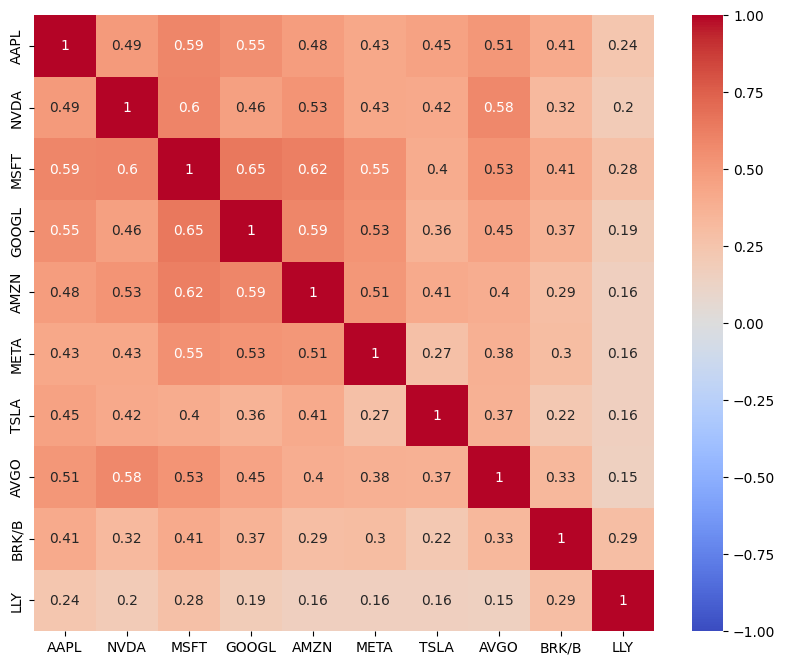

,AAPL,NVDA,MSFT,GOOGL,AMZN,META,TSLA,AVGO,BRK/B,LLY
AAPL,1.000000,0.492375,0.590106,0.548023,0.483912,0.429349,0.453314,0.510695,0.410232,0.235654
NVDA,0.492375,1.000000,0.599209,0.462188,0.527079,0.426005,0.415838,0.584427,0.323485,0.196417
MSFT,0.590106,0.599209,1.000000,0.649908,0.618132,0.546681,0.401486,0.530951,0.408257,0.275949
GOOGL,0.548023,0.462188,0.649908,1.000000,0.591938,0.528301,0.364853,0.449406,0.366892,0.191288
AMZN,0.483912,0.527079,0.618132,0.591938,1.000000,0.514393,0.407266,0.397102,0.293458,0.161261
META,0.429349,0.426005,0.546681,0.528301,0.514393,1.000000,0.274745,0.382295,0.297296,0.161455
TSLA,0.453314,0.415838,0.401486,0.364853,0.407266,0.274745,1.000000,0.368516,0.219107,0.161756
AVGO,0.510695,0.584427,0.530951,0.449406,0.397102,0.382295,0.368516,1.000000,0.329962,0.153988
BRK/B,0.410232,0.323485,0.408257,0.366892,0.293458,0.297296,0.219107,0.329962,1.000000,0.290417
LLY,0.235654,0.196417,0.275949,0.191288,0.161261,0.161455,0.161756,0.153988,0.290417,1.000000


,Sharpe,w_tan
Ticker,,
AAPL,0.718340,-0.054492
NVDA,1.307150,0.327897
MSFT,0.922586,0.073835
GOOGL,0.631765,-0.090233
AMZN,0.828257,0.120113
META,0.631657,0.005799
TSLA,0.732830,0.037766
AVGO,0.945945,0.126622
BRK/B,0.498418,0.044755


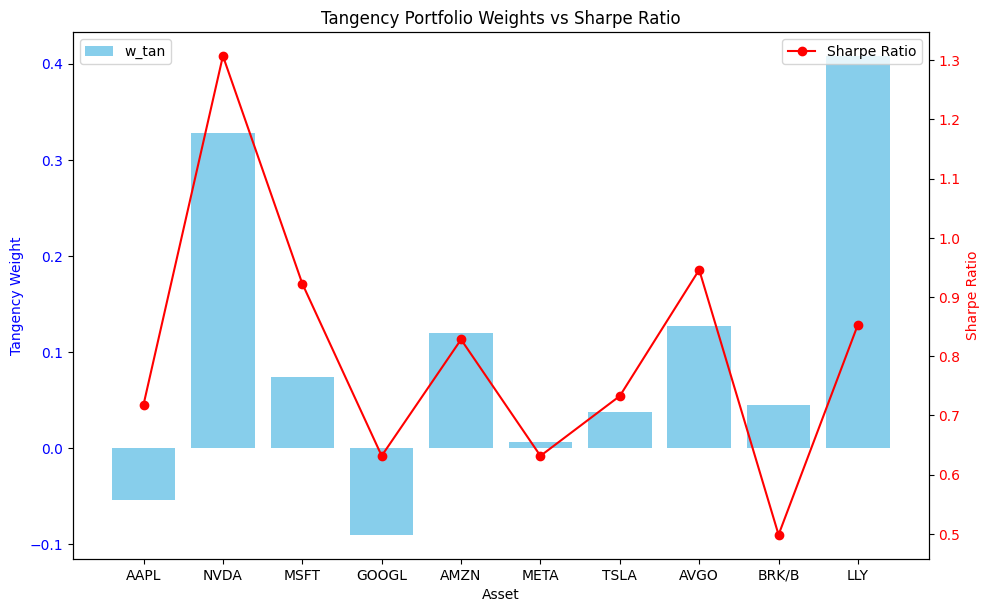

In [4]:
excess_returns = df.drop(columns=["date"])
excess_returns = df[tickers]

corr = excess_returns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.show()

display(corr)

# min correlated = LLY, AVGO
# max correlated = MSFT, GOOGL

cov = excess_returns.cov() * 52


mean = excess_returns.mean() * 52
Sigma = cov.values
mu = mean.values

x = np.linalg.solve(Sigma, mu)

w_tan_vec = x /x.sum()
w_tan = pd.Series(w_tan_vec, index=mean.index, name="w_tan")

summary_df.loc[w_tan.index, "w_tan"] = w_tan


display(summary_df[["Sharpe", "w_tan"]])

# Example: both are in the same DataFrame
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for w_tan
ax1.bar(summary_df.index, summary_df["w_tan"], color="skyblue", label="w_tan")
ax1.set_xlabel("Asset")
ax1.set_ylabel("Tangency Weight", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Second axis for Sharpe
ax2 = ax1.twinx()
ax2.plot(summary_df.index, summary_df["Sharpe"], color="red", marker="o", label="Sharpe Ratio")
ax2.set_ylabel("Sharpe Ratio", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Optional: improve layout and legend
fig.tight_layout()
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.title("Tangency Portfolio Weights vs Sharpe Ratio")
plt.show()

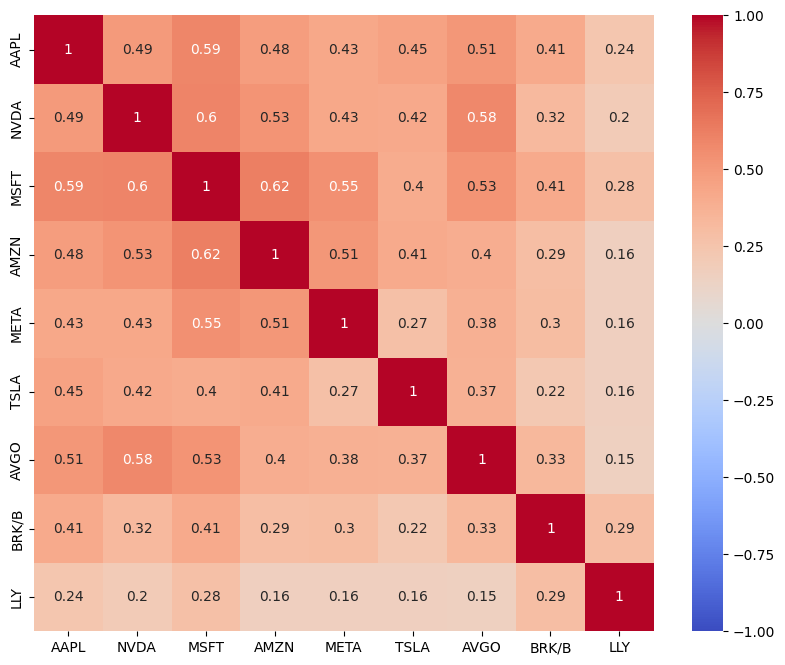

,AAPL,NVDA,MSFT,AMZN,META,TSLA,AVGO,BRK/B,LLY
AAPL,1.000000,0.492375,0.590106,0.483912,0.429349,0.453314,0.510695,0.410232,0.235654
NVDA,0.492375,1.000000,0.599209,0.527079,0.426005,0.415838,0.584427,0.323485,0.196417
MSFT,0.590106,0.599209,1.000000,0.618132,0.546681,0.401486,0.530951,0.408257,0.275949
AMZN,0.483912,0.527079,0.618132,1.000000,0.514393,0.407266,0.397102,0.293458,0.161261
META,0.429349,0.426005,0.546681,0.514393,1.000000,0.274745,0.382295,0.297296,0.161455
TSLA,0.453314,0.415838,0.401486,0.407266,0.274745,1.000000,0.368516,0.219107,0.161756
AVGO,0.510695,0.584427,0.530951,0.397102,0.382295,0.368516,1.000000,0.329962,0.153988
BRK/B,0.410232,0.323485,0.408257,0.293458,0.297296,0.219107,0.329962,1.000000,0.290417
LLY,0.235654,0.196417,0.275949,0.161261,0.161455,0.161756,0.153988,0.290417,1.000000


,Sharpe,w_tan
Ticker,,
AAPL,0.718340,-0.068016
NVDA,1.307150,0.328214
MSFT,0.922586,0.042736
GOOGL,0.631765,-0.090233
AMZN,0.828257,0.100913
META,0.631657,-0.005360
TSLA,0.732830,0.036508
AVGO,0.945945,0.121881
BRK/B,0.498418,0.036349


In [9]:
excess_returns = df.drop(columns=["date"])

tickers = ["AAPL", "NVDA", "MSFT", "AMZN", "META", "TSLA", "AVGO", "BRK/B", "LLY"]
excess_returns = df[tickers]

corr = excess_returns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.show()

display(corr)

# min correlated = LLY, AVGO
# max correlated = MSFT, GOOGL

cov = excess_returns.cov() * 52


mean = excess_returns.mean() * 52
Sigma = cov.values
mu = mean.values

x = np.linalg.solve(Sigma, mu)

w_tan_vec = x /x.sum()
w_tan = pd.Series(w_tan_vec, index=mean.index, name="w_tan")

summary_df.loc[w_tan.index, "w_tan"] = w_tan


display(summary_df[["Sharpe", "w_tan"]])